# Human Trafficking Analysis

Analysis by Vallian Sayoga

Dataset by [Andrej Marinchenko](https://www.kaggle.com/andrej0marinchenko/human-trafficking)

The FBI began accepting data on human trafficking from states in January 2013. Human trafficking includes offenses related to commercial sex acts and involuntary servitude.

This analysis includes:
1. Data cleaning
1. Data exploration
1. Descriptive statistics
1. Heatmap
1. Polynomial function to predict cases in 2021 & 2022

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

In [3]:
df = pd.read_csv("HT_2013-2020.csv")

In [4]:
df.head()

,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,COUNTY_NAME,REGION_NAME,POPULATION_GROUP_CODE,POPULATION_GROUP_DESC,OFFENSE_SUBCAT_ID,OFFENSE_NAME,OFFENSE_SUBCAT_NAME,ACTUAL_COUNT,UNFOUNDED_COUNT,CLEARED_COUNT,JUVENILE_CLEARED_COUNT
0,2016,MO0480600,Independence,NaN,City,MO,Missouri,West North Central,JACKSON,Midwest,2,"Cities from 100,000 thru 249,999",81,Human Trafficking,Commercial Sex Acts,2,0,2,0
1,2016,TX2201200,Fort Worth,NaN,City,TX,Texas,West South Central,PARKER; DENTON; TARRANT,South,1B,"Cities from 500,000 thru 999,999",82,Human Trafficking,Involuntary Servitude,1,0,0,0
2,2016,TX2270100,Austin,NaN,City,TX,Texas,West South Central,WILLIAMSON; TRAVIS,South,1B,"Cities from 500,000 thru 999,999",82,Human Trafficking,Involuntary Servitude,2,0,0,0
3,2019,NV0020100,Las Vegas Metropolitan Police Department,NaN,City,NV,Nevada,Mountain,CLARK,West,1A,"Cities 1,000,000 or over",81,Human Trafficking,Commercial Sex Acts,15,0,4,0
4,2017,AZ0070500,Chandler,NaN,City,AZ,Arizona,Mountain,MARICOPA,West,2,"Cities from 100,000 thru 249,999",81,Human Trafficking,Commercial Sex Acts,1,0,0,0


###  Finding missing values

In [5]:
df.isna().sum()

DATA_YEAR                    0
ORI                          0
PUB_AGENCY_NAME              0
PUB_AGENCY_UNIT           4203
AGENCY_TYPE_NAME             0
STATE_ABBR                   0
STATE_NAME                   0
DIVISION_NAME                0
COUNTY_NAME                111
REGION_NAME                  0
POPULATION_GROUP_CODE        0
POPULATION_GROUP_DESC        0
OFFENSE_SUBCAT_ID            0
OFFENSE_NAME                 0
OFFENSE_SUBCAT_NAME          0
ACTUAL_COUNT                 0
UNFOUNDED_COUNT              0
CLEARED_COUNT                0
JUVENILE_CLEARED_COUNT       0
dtype: int64

### Replacing missing values in `PUB_AGENCY_UNIT` as "UNKNOWN" & `COUNTY_NAME` with its mode

In [6]:
df.PUB_AGENCY_UNIT.replace(np.nan, "UNKNOWN", inplace=True)

In [7]:
df.COUNTY_NAME.replace(np.nan, df.COUNTY_NAME.mode()[0], inplace=True)

In [8]:
df[['PUB_AGENCY_UNIT','COUNTY_NAME']].isna().sum()

PUB_AGENCY_UNIT    0
COUNTY_NAME        0
dtype: int64

### Choosing relevant columns

In [9]:
df.drop(columns=[
    'ORI', 'POPULATION_GROUP_CODE', 'OFFENSE_SUBCAT_ID', 'OFFENSE_NAME'],
    inplace=True)

### Basic statistical descriptions

In [10]:
df.describe(include='all')

,DATA_YEAR,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,COUNTY_NAME,REGION_NAME,POPULATION_GROUP_DESC,OFFENSE_SUBCAT_NAME,ACTUAL_COUNT,UNFOUNDED_COUNT,CLEARED_COUNT,JUVENILE_CLEARED_COUNT
count,4417.000000,4417,4417,4417,4417,4417,4417,4417,4417,4417,4417,4417.000000,4417.000000,4417.000000,4417.000000
unique,NaN,952,107,7,46,46,9,601,4,19,2,NaN,NaN,NaN,NaN
top,NaN,State Police:,UNKNOWN,City,TX,Texas,West South Central,HENNEPIN,South,"Cities from 100,000 thru 249,999",Commercial Sex Acts,NaN,NaN,NaN,NaN
freq,NaN,206,4203,3081,984,984,1172,231,2263,575,3558,NaN,NaN,NaN,NaN
mean,2017.884763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.173194,0.072674,0.837673,0.032601
std,1.843414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.128820,0.926374,2.069699,0.433354
min,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,0.000000,0.000000,0.000000
25%,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000
50%,2018.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000
75%,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,1.000000,0.000000


### Plotting functions

In [11]:
def barchart(data, x, y, size, title, xlab, ylab, hue=None):
    plt.figure(figsize=size)
    if hue is None:
        sns.barplot(data=data.groupby(x, as_index=False)[y].sum(), x=x, y=y)
    else:
        sns.barplot(data=data.groupby([x, hue], as_index=False)[y].sum(), x=x, y=y, hue=hue)
    
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()
    
def linechart(data, x, y, size, title, xlab, ylab, hue=None):
    plt.figure(figsize=size)
    if hue is None:
        sns.lineplot(data=data.groupby(x, as_index=False)[y].sum(),
            x=x,
            y=y,
            markers=True,
            dashes=False)
    else:
        sns.lineplot(data=data.groupby([x, hue], as_index=False)[y].sum(),
            x=x,
            y=y,
            hue=hue,
            markers=["o" for i in range(len(df[hue].unique()))],
            style=hue,
            dashes=False)
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

#### Linechart of human trafficking in USA from 2013 - 2020

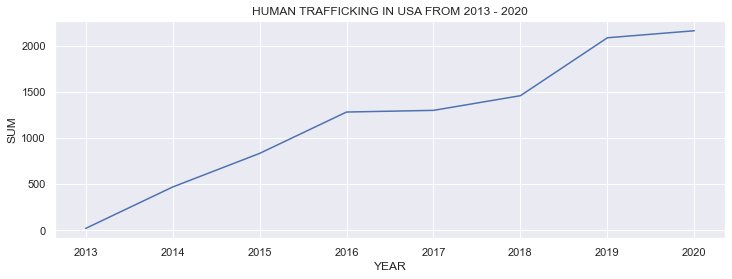

In [12]:
linechart(df, 'DATA_YEAR', 'ACTUAL_COUNT', (12,4), "HUMAN TRAFFICKING IN USA FROM 2013 - 2020", "YEAR", "SUM")

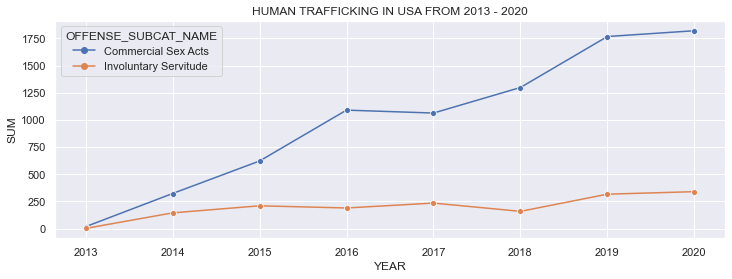

In [13]:
linechart(df, 'DATA_YEAR', 'ACTUAL_COUNT', (12,4), "HUMAN TRAFFICKING IN USA FROM 2013 - 2020", "YEAR", "SUM", "OFFENSE_SUBCAT_NAME")

#### Heatmap of numerical data correlation

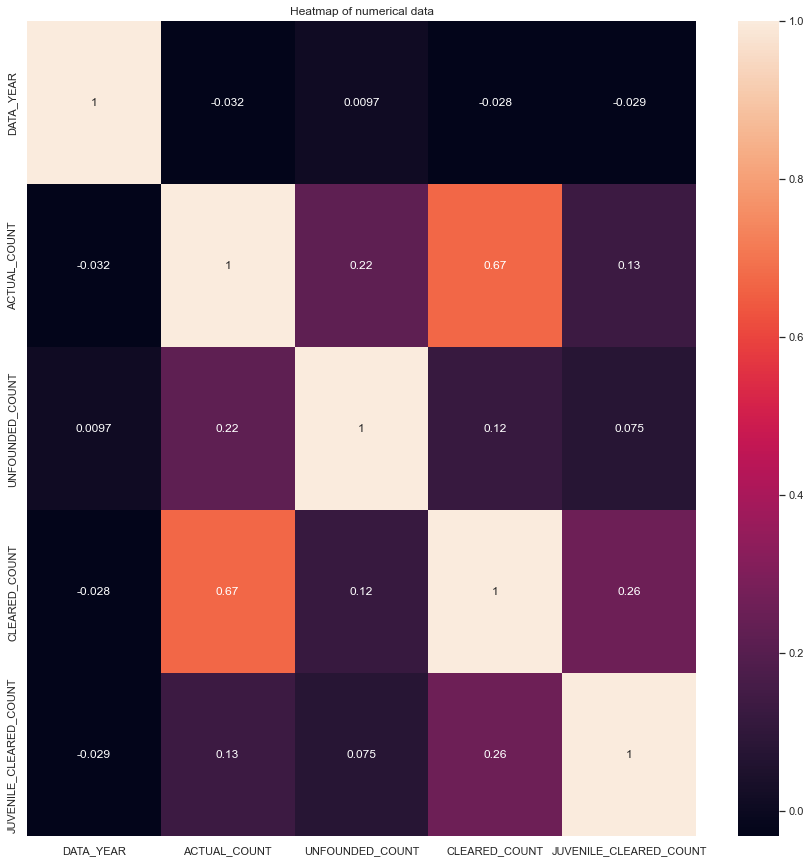

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.title("Heatmap of numerical data")
plt.show()

The chart shows weak correlations among all of the numerical variables, except `ACTUAL_COUNT` vs `CLEARED_COUNT`

### 3 states with the worst cases for each year

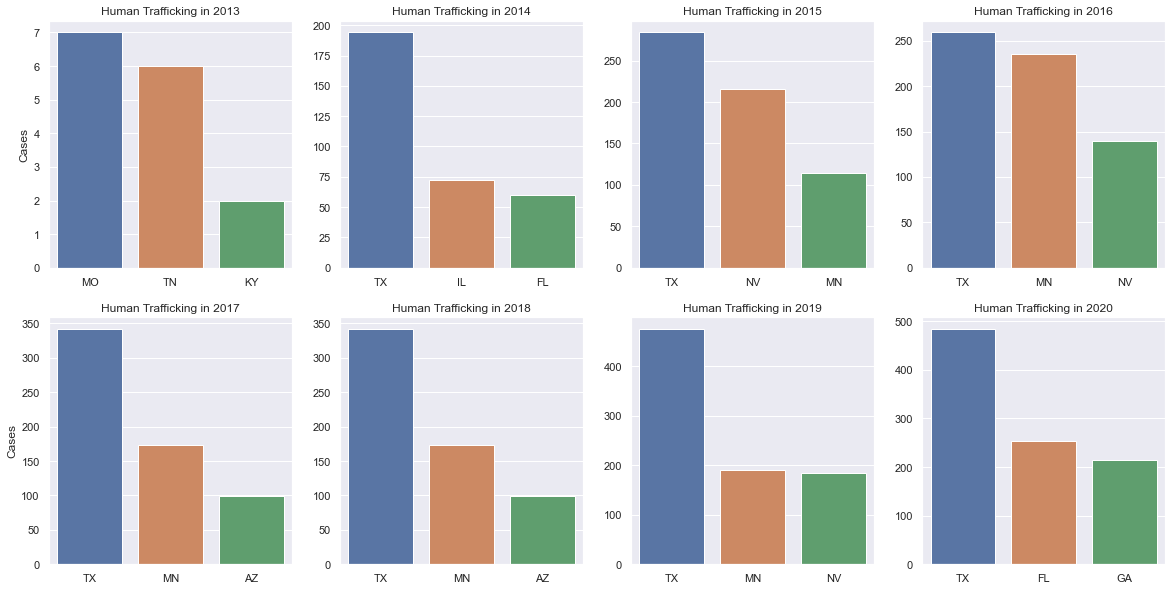

In [15]:
years = [i for i in sorted(df.DATA_YEAR.unique())]

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20,10))

ax1 = sns.barplot(data=df.loc[df.DATA_YEAR == 2013].groupby('STATE_ABBR', as_index=False).ACTUAL_COUNT.sum().sort_values("ACTUAL_COUNT", ascending=False).iloc[:3], ax=axs[0][0], x="STATE_ABBR", y="ACTUAL_COUNT")

ax2 = sns.barplot(data=df.loc[df.DATA_YEAR == 2014].groupby('STATE_ABBR', as_index=False).ACTUAL_COUNT.sum().sort_values("ACTUAL_COUNT", ascending=False).iloc[:3], ax=axs[0][1], x="STATE_ABBR", y="ACTUAL_COUNT")

ax3 = sns.barplot(data=df.loc[df.DATA_YEAR == 2015].groupby('STATE_ABBR', as_index=False).ACTUAL_COUNT.sum().sort_values("ACTUAL_COUNT", ascending=False).iloc[:3], ax=axs[0][2], x="STATE_ABBR", y="ACTUAL_COUNT")

ax4 = sns.barplot(data=df.loc[df.DATA_YEAR == 2016].groupby('STATE_ABBR', as_index=False).ACTUAL_COUNT.sum().sort_values("ACTUAL_COUNT", ascending=False).iloc[:3], ax=axs[0][3], x="STATE_ABBR", y="ACTUAL_COUNT")

ax5 = sns.barplot(data=df.loc[df.DATA_YEAR == 2017].groupby('STATE_ABBR', as_index=False).ACTUAL_COUNT.sum().sort_values("ACTUAL_COUNT", ascending=False).iloc[:3], ax=axs[1][0], x="STATE_ABBR", y="ACTUAL_COUNT")

ax6 = sns.barplot(data=df.loc[df.DATA_YEAR == 2017].groupby('STATE_ABBR', as_index=False).ACTUAL_COUNT.sum().sort_values("ACTUAL_COUNT", ascending=False).iloc[:3], ax=axs[1][1], x="STATE_ABBR", y="ACTUAL_COUNT")

ax7 = sns.barplot(data=df.loc[df.DATA_YEAR == 2019].groupby('STATE_ABBR', as_index=False).ACTUAL_COUNT.sum().sort_values("ACTUAL_COUNT", ascending=False).iloc[:3], ax=axs[1][2], x="STATE_ABBR", y="ACTUAL_COUNT")

ax8 = sns.barplot(data=df.loc[df.DATA_YEAR == 2020].groupby('STATE_ABBR', as_index=False).ACTUAL_COUNT.sum().sort_values("ACTUAL_COUNT", ascending=False).iloc[:3], ax=axs[1][3], x="STATE_ABBR", y="ACTUAL_COUNT")

for axis, year in zip([ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8], years):
    axis.title.set_text(f'Human Trafficking in {year}')
    axis.set_xlabel(None)
    axis.set_ylabel(None)
ax1.set_ylabel("Cases")
ax5.set_ylabel("Cases")

plt.show()


Human trafficking is particularly relevant to Texas because of its close proximity to the U.S.–Mexican border, one of the most-crossed international borders in the world, and its extremely diverse population, especially in Houston.

Source: [Human trafficking in Texas](https://en.wikipedia.org/wiki/Human_trafficking_in_Texas)

### Cases distribution for each year and whole

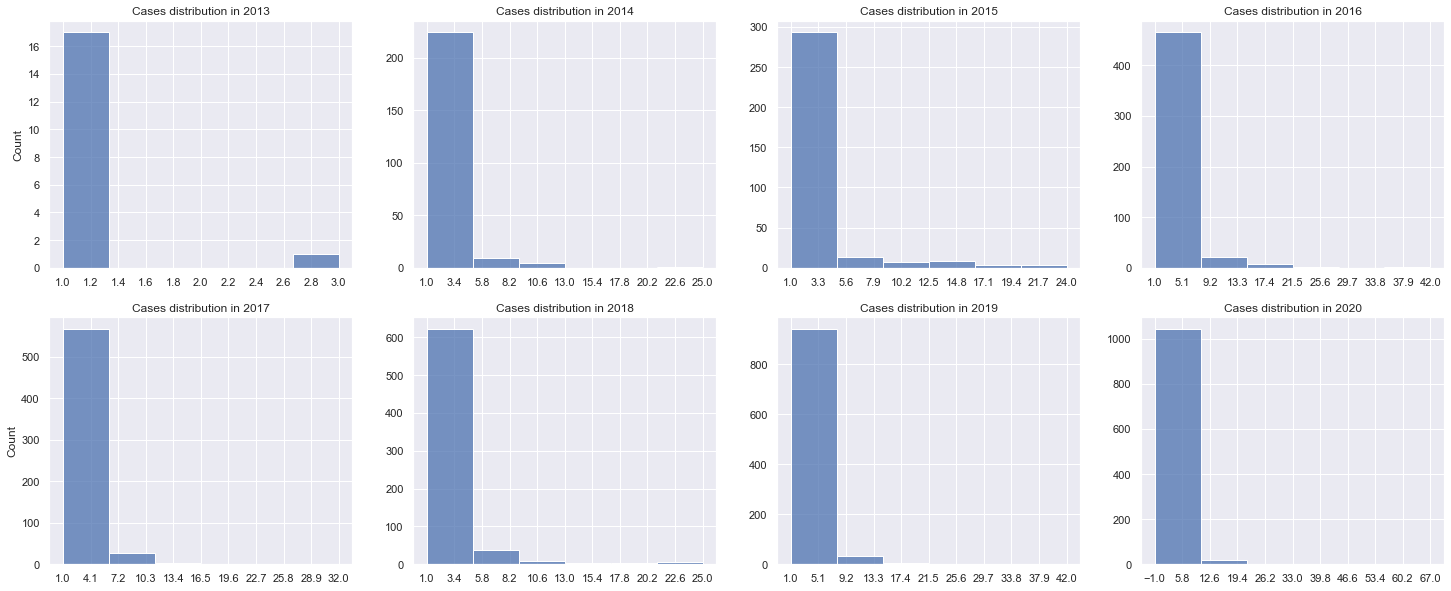

In [16]:
years = [i for i in sorted(df.DATA_YEAR.unique())]

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(25,10))

ax1 = sns.histplot(data=df.ACTUAL_COUNT.loc[df.DATA_YEAR == 2013], ax=axs[0][0], bins=6)

ax2 = sns.histplot(data=df.ACTUAL_COUNT.loc[df.DATA_YEAR == 2014], ax=axs[0][1], bins=6)

ax3 = sns.histplot(data=df.ACTUAL_COUNT.loc[df.DATA_YEAR == 2015], ax=axs[0][2], bins=6)

ax4 = sns.histplot(data=df.ACTUAL_COUNT.loc[df.DATA_YEAR == 2016], ax=axs[0][3], bins=6)

ax5 = sns.histplot(data=df.ACTUAL_COUNT.loc[df.DATA_YEAR == 2017], ax=axs[1][0], bins=6)

ax6 = sns.histplot(data=df.ACTUAL_COUNT.loc[df.DATA_YEAR == 2018], ax=axs[1][1], bins=6)

ax7 = sns.histplot(data=df.ACTUAL_COUNT.loc[df.DATA_YEAR == 2019], ax=axs[1][2], bins=6)

ax8 = sns.histplot(data=df.ACTUAL_COUNT.loc[df.DATA_YEAR == 2020], ax=axs[1][3], bins=6)

for axis, year in zip([ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8], years):
    axis.title.set_text(f'Cases distribution in {year}')
    axis.set_xlabel(None)
    axis.set_ylabel(None)
    axis.set_xticks(np.histogram(df.ACTUAL_COUNT.loc[df.DATA_YEAR == year])[1], bins=6)
ax1.set_ylabel("Count")
ax5.set_ylabel("Count")

plt.show()


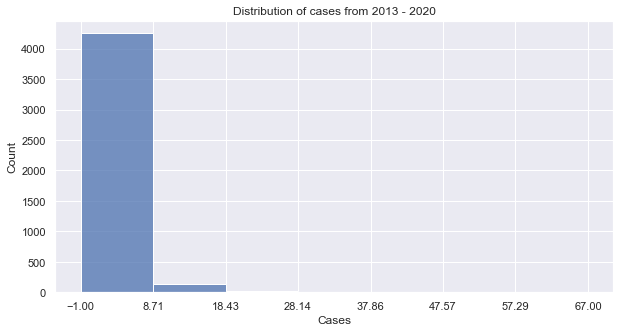

In [17]:
plt.figure(figsize=(10,5))
plt.title("Distribution of cases from 2013 - 2020")
sns.histplot(df.ACTUAL_COUNT, bins=7)
plt.xticks(np.histogram(df.ACTUAL_COUNT, bins=7)[1])
plt.ylabel("Count")
plt.xlabel("Cases")

plt.show()

### Regression plot of `DATA_YEAR` vs sum of `ACTUAL_COUNT`

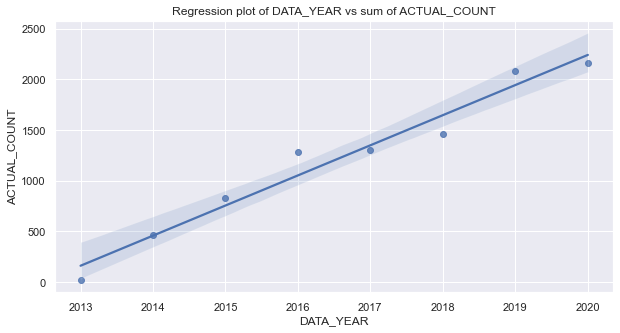

In [18]:
plt.figure(figsize=(10,5))
plt.title("Regression plot of DATA_YEAR vs sum of ACTUAL_COUNT")
sns.regplot(data=df.groupby('DATA_YEAR', as_index=False).ACTUAL_COUNT.sum(), x='DATA_YEAR', y='ACTUAL_COUNT')
plt.show()

According to the plot, number of cases in 2021 and 2022 are predicted to increase

### Creating a model to predict cases in 2021 and 2022

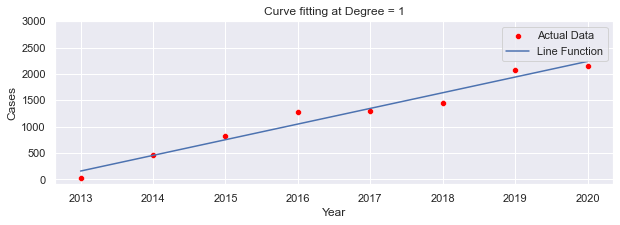

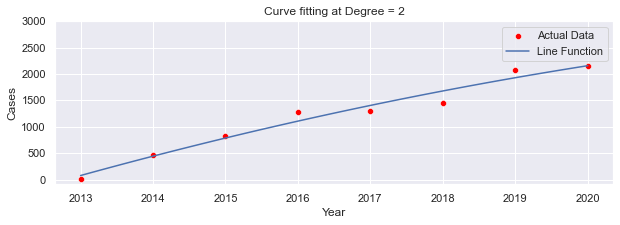

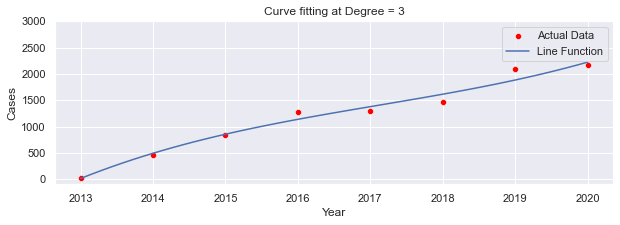

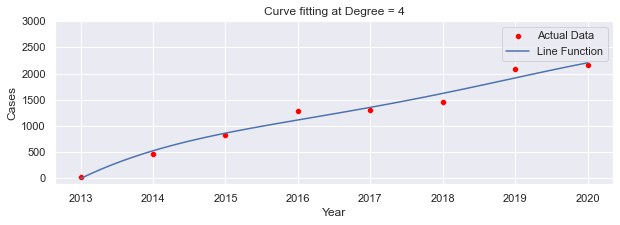

F:\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


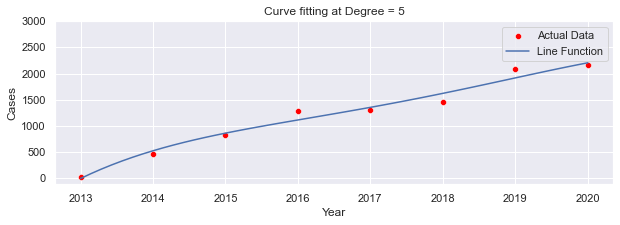

In [25]:
# Finding the best polynomial degree
for i in (1,2,3,4,5):
    year_grp = df.groupby('DATA_YEAR', as_index=False).ACTUAL_COUNT.sum()
    model = np.polyfit(year_grp.DATA_YEAR, year_grp.ACTUAL_COUNT, deg=i)
    predict = np.poly1d(model)

    year = np.linspace(2013,2020,50)
    y_pred = predict(year)
    plt.figure(figsize=(10,3))
    plt.title(f"Curve fitting at Degree = {i}")
    sns.scatterplot(x=year_grp.DATA_YEAR, y=year_grp.ACTUAL_COUNT, label='Actual Data', color='red')
    sns.lineplot(x=year, y=y_pred, label='Line Function')
    plt.xticks(np.linspace(2013,2020,8))
    plt.yticks(np.linspace(0,3000, 7))
    plt.xlabel("Year")
    plt.ylabel("Cases")
    plt.show()

Further analysis must be conducted on MSE, and $R^{2}$ with more appropriate libraries such as ScikitLearn.

For now, let's predict the cases in 2021 and 2022 using the $3^{rd}$ degree.

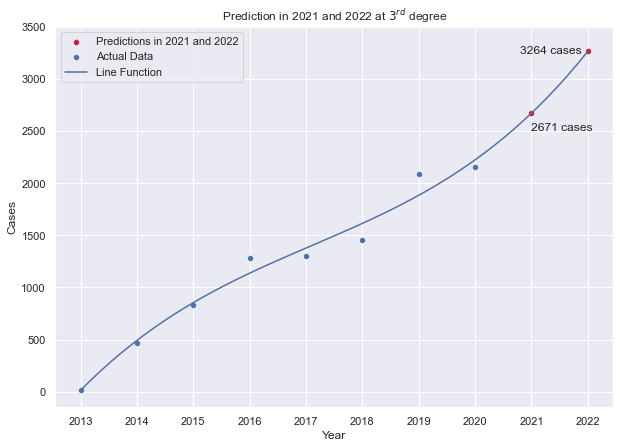

In [27]:
year_grp = df.groupby('DATA_YEAR', as_index=False).ACTUAL_COUNT.sum()
model = np.polyfit(year_grp.DATA_YEAR, year_grp.ACTUAL_COUNT, deg=3)
predict = np.poly1d(model)

year = np.linspace(2013,2022,50)
y_pred = predict(year)
plt.figure(figsize=(10,7))
plt.title("Prediction in 2021 and 2022 at $3^{rd}$ degree")
sns.scatterplot(x=(2021,2022), y=(predict(2021), predict(2022)), label='Predictions in 2021 and 2022', color='crimson')
sns.scatterplot(x=year_grp.DATA_YEAR, y=year_grp.ACTUAL_COUNT, label='Actual Data')
sns.lineplot(x=year, y=y_pred, label='Line Function')
plt.annotate(f"{int(predict(2021))} cases", (2021,2500))
plt.annotate(f"{int(predict(2022))} cases", (2020.8, 3240))
plt.xticks(np.linspace(2013,2022,10))
plt.yticks(np.linspace(0,3500, 8))
plt.xlabel("Year")
plt.ylabel("Cases")
plt.show()